In [1]:
import pandas as pd
import numpy as np

# Chapter 11 Time Series

## 11.1 Date and Time Data Types and Tools

In [2]:
from datetime import datetime

In [5]:
now = datetime.now()

In [6]:
now.year, now.month, now.day

(2020, 5, 21)

In [7]:
delta = datetime(2011, 1, 7) - datetime(2008, 5, 12)

In [8]:
delta

datetime.timedelta(days=970)

In [9]:
delta.days

970

In [10]:
delta.seconds

0

In [11]:
from datetime import timedelta

In [12]:
start = datetime(2011, 1, 7)

In [13]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [14]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### Converting Between String and Datetime

In [16]:
stamp = datetime(2011, 1, 3)

In [17]:
str(stamp)

'2011-01-03 00:00:00'

In [18]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [19]:
# From string to datetime
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [20]:
datestrs = ['7/6/2011', '8/9/2015']

In [21]:
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2015, 8, 9, 0, 0)]

In [22]:
datestr = 198805
datetime.strptime(str(datestr), '%Y%m')

datetime.datetime(1988, 5, 1, 0, 0)

In [23]:
from dateutil.parser import parse

In [24]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [25]:
parse('06/07/2011', dayfirst = True)

datetime.datetime(2011, 7, 6, 0, 0)

In [26]:
parse('06/07/2011', dayfirst = False)

datetime.datetime(2011, 6, 7, 0, 0)

In [27]:
datastrs = ['198805', '198806', '198807']

In [29]:
pd.to_datetime(datastrs, format='%Y%m')

DatetimeIndex(['1988-05-01', '1988-06-01', '1988-07-01'], dtype='datetime64[ns]', freq=None)

In [30]:
# NaT: not a time
idx = pd.to_datetime(datestrs + [None])

In [31]:
idx

DatetimeIndex(['2011-07-06', '2015-08-09', 'NaT'], dtype='datetime64[ns]', freq=None)

## 11.2 Time Series Basics

In [32]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
....: datetime(2011, 1, 7), datetime(2011, 1, 8),
....: datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [35]:
ts = pd.Series(np.random.randn(6), index = dates)

In [36]:
ts

2011-01-02   -0.846259
2011-01-05   -0.518185
2011-01-07   -2.553100
2011-01-08   -1.264504
2011-01-10   -1.395205
2011-01-12   -0.528635
dtype: float64

In [37]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [38]:
ts + ts[::2]

2011-01-02   -1.692518
2011-01-05         NaN
2011-01-07   -5.106199
2011-01-08         NaN
2011-01-10   -2.790409
2011-01-12         NaN
dtype: float64

In [39]:
ts.index.dtype

dtype('<M8[ns]')

### Indexing, Selection and Subsetting

In [40]:
stamp = ts.index[2]
stamp

Timestamp('2011-01-07 00:00:00')

In [41]:
ts[stamp]

-2.5530995357281245

In [42]:
ts.loc[stamp]

-2.5530995357281245

In [44]:
ts['20110110']

-1.3952047430855794

In [45]:
longer_ts = pd.Series(np.random.randn(1000), index = pd.date_range('1/1/2000', periods = 1000))

In [46]:
longer_ts

2000-01-01    0.856458
2000-01-02    0.291256
2000-01-03   -1.860559
2000-01-04   -0.060745
2000-01-05   -1.194434
2000-01-06   -1.790624
2000-01-07    0.105210
2000-01-08   -0.500051
2000-01-09    1.457354
2000-01-10   -0.561977
2000-01-11   -0.886710
2000-01-12    0.883814
2000-01-13   -0.482577
2000-01-14   -0.497972
2000-01-15    1.180046
2000-01-16   -1.145844
2000-01-17    0.099369
2000-01-18    1.916549
2000-01-19   -1.067879
2000-01-20    2.293268
2000-01-21    0.646777
2000-01-22   -0.671886
2000-01-23    2.572937
2000-01-24    0.840454
2000-01-25   -0.996689
2000-01-26    1.122792
2000-01-27   -0.727770
2000-01-28    0.200911
2000-01-29    2.780527
2000-01-30   -1.354429
                ...   
2002-08-28   -1.237803
2002-08-29   -0.499207
2002-08-30    0.897604
2002-08-31    1.515681
2002-09-01   -0.161056
2002-09-02    2.578172
2002-09-03   -0.174588
2002-09-04   -1.316413
2002-09-05   -0.423594
2002-09-06    0.482175
2002-09-07   -1.466895
2002-09-08   -0.688576
2002-09-09 

In [49]:
longer_ts['2001-05']

2001-05-01    0.759792
2001-05-02   -0.090114
2001-05-03   -1.696163
2001-05-04   -0.770534
2001-05-05   -0.050893
2001-05-06    0.912144
2001-05-07   -1.467470
2001-05-08   -0.280198
2001-05-09   -0.119583
2001-05-10   -1.333486
2001-05-11    3.531174
2001-05-12    0.150107
2001-05-13    0.782247
2001-05-14    1.560931
2001-05-15   -1.988380
2001-05-16   -0.016793
2001-05-17   -0.534641
2001-05-18   -2.226201
2001-05-19    1.612138
2001-05-20    0.921695
2001-05-21   -0.416528
2001-05-22   -0.215478
2001-05-23   -1.105145
2001-05-24   -0.032557
2001-05-25   -0.119048
2001-05-26   -1.360309
2001-05-27   -0.107559
2001-05-28    0.419125
2001-05-29    0.435750
2001-05-30    0.017181
2001-05-31    0.034357
Freq: D, dtype: float64

In [51]:
ts[datetime(2001, 11,7):]

2011-01-02   -0.846259
2011-01-05   -0.518185
2011-01-07   -2.553100
2011-01-08   -1.264504
2011-01-10   -1.395205
2011-01-12   -0.528635
dtype: float64

In [52]:
ts

2011-01-02   -0.846259
2011-01-05   -0.518185
2011-01-07   -2.553100
2011-01-08   -1.264504
2011-01-10   -1.395205
2011-01-12   -0.528635
dtype: float64

In [53]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -2.553100
2011-01-08   -1.264504
2011-01-10   -1.395205
dtype: float64

In [54]:
ts.truncate(after = '1/9/2011')

2011-01-02   -0.846259
2011-01-05   -0.518185
2011-01-07   -2.553100
2011-01-08   -1.264504
dtype: float64

In [56]:
dates = pd.date_range('1/1/2000', periods = 100, freq = 'W-WED')

In [57]:
long_df = pd.DataFrame(np.random.randn(100,4), index = dates, columns = ['Colorado', 'Texas', 'New York', 'Ohio'])

In [58]:
long_df

,Colorado,Texas,New York,Ohio
2000-01-05,-0.405908,0.011274,3.482605,0.770361
2000-01-12,0.772492,-1.690180,-0.744452,1.487442
2000-01-19,-0.536246,-1.012179,0.311447,0.044711
2000-01-26,0.464478,1.292060,-0.811772,0.993489
2000-02-02,-0.951259,-0.663128,-0.068056,-1.087883
2000-02-09,-2.429758,0.557109,-0.515726,0.876163
2000-02-16,-0.290175,-0.035882,-0.273295,1.366242
2000-02-23,0.747103,0.455801,-2.265359,-1.895225
2000-03-01,-0.493526,0.028422,-0.607440,-1.358876
2000-03-08,0.496161,-0.582820,-1.254780,-0.772143


In [59]:
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,0.648556,-1.676312,0.476556,0.352786
2001-05-09,1.349535,-0.057583,2.575614,1.072404
2001-05-16,-0.862491,0.438148,-0.984996,1.771348
2001-05-23,0.184451,-0.880612,-1.086660,-0.851210
2001-05-30,1.090601,0.049289,-1.040168,0.341757


### Time Series with Duplicated indices

In [60]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
....: '1/2/2000', '1/3/2000'])

In [61]:
dup_ts = pd.Series(np.arange(5), index = dates)

In [62]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [63]:
dup_ts.index.is_unique

False

In [64]:
# aggregate the data having non-unique timestamps
grouped = dup_ts.groupby(level = 0)

In [65]:
grouped

In [66]:
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [67]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## 11.3 Date Ranges, Frequencies, and Shifting

In [68]:
ts

2011-01-02   -0.846259
2011-01-05   -0.518185
2011-01-07   -2.553100
2011-01-08   -1.264504
2011-01-10   -1.395205
2011-01-12   -0.528635
dtype: float64

In [69]:
resampler = ts.resample('D')

In [70]:
resampler

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

### Generating Date Ranges

In [79]:
index = pd.date_range('2012-04-01', '2012-06-01', periods = 14)

In [80]:
index

DatetimeIndex([          '2012-04-01 00:00:00',
               '2012-04-05 16:36:55.384615384',
               '2012-04-10 09:13:50.769230769',
               '2012-04-15 01:50:46.153846154',
               '2012-04-19 18:27:41.538461538',
               '2012-04-24 11:04:36.923076923',
               '2012-04-29 03:41:32.307692308',
               '2012-05-03 20:18:27.692307692',
               '2012-05-08 12:55:23.076923077',
               '2012-05-13 05:32:18.461538461',
               '2012-05-17 22:09:13.846153846',
               '2012-05-22 14:46:09.230769231',
               '2012-05-27 07:23:04.615384616',
                         '2012-06-01 00:00:00'],
              dtype='datetime64[ns]', freq=None)

### Frequencies and Date Offsets

In [81]:
from pandas.tseries.offsets import Hour, Minute

In [82]:
pd.date_range('2000-01-01', '2001-01-03 23:59', freq = '4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               ...
               '2001-01-02 08:00:00', '2001-01-02 12:00:00',
               '2001-01-02 16:00:00', '2001-01-02 20:00:00',
               '2001-01-03 00:00:00', '2001-01-03 04:00:00',
               '2001-01-03 08:00:00', '2001-01-03 12:00:00',
               '2001-01-03 16:00:00', '2001-01-03 20:00:00'],
              dtype='datetime64[ns]', length=2214, freq='4H')

In [83]:
# Get the third Friday of each month
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')

In [84]:
rng

DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

### Sgifting Data (leading and Lagging)

In [86]:
ts = pd.Series(np.random.randn(4), index = pd.date_range('1/1/2000', periods = 4, freq = 'M'))

In [87]:
ts

2000-01-31    0.376208
2000-02-29    0.174729
2000-03-31    0.953557
2000-04-30    0.107373
Freq: M, dtype: float64

In [88]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.376208
2000-04-30    0.174729
Freq: M, dtype: float64

In [89]:
ts.shift(-2)

2000-01-31    0.953557
2000-02-29    0.107373
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [90]:
# percentage change
ts/ts.shift(-1) -1 

2000-01-31    1.153098
2000-02-29   -0.816761
2000-03-31    7.880772
2000-04-30         NaN
Freq: M, dtype: float64

In [91]:
ts.shift(2, freq = 'M')

2000-03-31    0.376208
2000-04-30    0.174729
2000-05-31    0.953557
2000-06-30    0.107373
Freq: M, dtype: float64

### Shirting dates with offsets

In [92]:
from pandas.tseries.offsets import Day, MonthEnd

In [93]:
now + 3*Day()

Timestamp('2020-05-24 15:24:44.253803')

In [94]:
now + MonthEnd()

Timestamp('2020-05-31 15:24:44.253803')

In [95]:
now + MonthEnd(2)

Timestamp('2020-06-30 15:24:44.253803')

In [96]:
offset = MonthEnd()

In [97]:
offset.rollback(now)

Timestamp('2020-04-30 15:24:44.253803')

In [98]:
offset.rollforward(now)

Timestamp('2020-05-31 15:24:44.253803')

In [101]:
ts = pd.Series(np.random.randn(20), index = pd.date_range('1/15/2000', periods = 20, freq = '4d'))

In [102]:
ts

2000-01-15    1.927035
2000-01-19    0.229043
2000-01-23   -0.004740
2000-01-27   -1.141203
2000-01-31    1.161543
2000-02-04   -0.144711
2000-02-08    0.829075
2000-02-12   -0.981383
2000-02-16   -2.222622
2000-02-20   -1.495935
2000-02-24   -0.644052
2000-02-28   -0.814791
2000-03-03    0.816281
2000-03-07   -1.645719
2000-03-11   -0.526142
2000-03-15    0.107365
2000-03-19   -0.234148
2000-03-23    0.891311
2000-03-27   -0.278495
2000-03-31   -0.300625
Freq: 4D, dtype: float64

In [104]:
ts.groupby(offset.rollforward).mean()

2000-01-31    0.434336
2000-02-29   -0.782060
2000-03-31   -0.146271
dtype: float64

In [105]:
ts.resample('M').mean()

2000-01-31    0.434336
2000-02-29   -0.782060
2000-03-31   -0.146271
Freq: M, dtype: float64

## 11.4 Time Zone Handling

In [106]:
import pytz

In [108]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [114]:
tz = pytz.timezone('America/New_York')

In [115]:
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### Time Zone Localization and Conversion

In [116]:
rng = pd.date_range('3/9/2012 9:30', periods = 6, freq = 'D')

In [117]:
ts = pd.Series(np.random.randn(len(rng)), index = rng)

In [118]:
ts

2012-03-09 09:30:00   -0.212025
2012-03-10 09:30:00    0.285902
2012-03-11 09:30:00    0.100122
2012-03-12 09:30:00    0.983749
2012-03-13 09:30:00    1.686477
2012-03-14 09:30:00    0.728609
Freq: D, dtype: float64

In [119]:
print(ts.index.tz)

None


In [120]:
pd.date_range('3/9/2012 9:30', periods = 6, freq = 'D', tz = 'UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [121]:
ts_utc = ts.tz_localize('UTC')

In [122]:
ts_utc

2012-03-09 09:30:00+00:00   -0.212025
2012-03-10 09:30:00+00:00    0.285902
2012-03-11 09:30:00+00:00    0.100122
2012-03-12 09:30:00+00:00    0.983749
2012-03-13 09:30:00+00:00    1.686477
2012-03-14 09:30:00+00:00    0.728609
Freq: D, dtype: float64

In [123]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [124]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -0.212025
2012-03-10 04:30:00-05:00    0.285902
2012-03-11 05:30:00-04:00    0.100122
2012-03-12 05:30:00-04:00    0.983749
2012-03-13 05:30:00-04:00    1.686477
2012-03-14 05:30:00-04:00    0.728609
Freq: D, dtype: float64

## 11.5 Periods and Period Arithmetic

In [128]:
p = pd.Period(2007, freq='A-DEC')

In [129]:
p

Period('2007', 'A-DEC')

In [130]:
p + 5

Period('2012', 'A-DEC')

In [131]:
values = ['2001Q3', '2002Q2', '2003Q1']

In [132]:
index = pd.PeriodIndex(values, freq = 'Q-DEC')

In [133]:
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### Period Frequency Conversion

In [134]:
p.asfreq('M', how = 'start')

Period('2007-01', 'M')

In [135]:
rng = pd.period_range('2006', '2009', freq = 'A-DEC')

In [136]:
ts = pd.Series(np.random.randn(len(rng)), index = rng)

In [137]:
ts

2006    0.342144
2007   -0.441649
2008    1.057731
2009    0.002323
Freq: A-DEC, dtype: float64

In [140]:
ts.asfreq('M', how = 'start')

2006-01    0.342144
2007-01   -0.441649
2008-01    1.057731
2009-01    0.002323
Freq: M, dtype: float64

In [141]:
ts.asfreq('M', how = 'end')

2006-12    0.342144
2007-12   -0.441649
2008-12    1.057731
2009-12    0.002323
Freq: M, dtype: float64

### Quarterly Period Frequencies

In [147]:
p = pd.Period('2012Q4', freq='Q-JAN')

In [148]:
p

Period('2012Q4', 'Q-JAN')

In [149]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [150]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [151]:
# get the timestamp at 4 PM on the second-to-last business day of the quarter
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

In [152]:
p4pm

Period('2012-01-30 16:00', 'T')

In [153]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [155]:
rng = pd.period_range('2011Q3', '2012Q4', freq = 'Q-JAN')

In [156]:
ts = pd.Series(np.arange(len(rng)), index = rng)

In [157]:
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

### Converting Timestamps to Periods (and Back)

In [158]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')

In [159]:
ts = pd.Series(np.random.randn(3), index=rng)

In [160]:
ts

2000-01-31    0.323172
2000-02-29   -0.326000
2000-03-31    0.209808
Freq: M, dtype: float64

In [161]:
pts = ts.to_period()

In [162]:
pts

2000-01    0.323172
2000-02   -0.326000
2000-03    0.209808
Freq: M, dtype: float64

In [163]:
# convert back
# to_timestamp()

### Creating a PeriodIndex from Arrays

In [164]:
data = pd.read_csv('macrodata.csv')

In [165]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
5      1960.0
6      1960.0
7      1960.0
8      1961.0
9      1961.0
10     1961.0
11     1961.0
12     1962.0
13     1962.0
14     1962.0
15     1962.0
16     1963.0
17     1963.0
18     1963.0
19     1963.0
20     1964.0
21     1964.0
22     1964.0
23     1964.0
24     1965.0
25     1965.0
26     1965.0
27     1965.0
28     1966.0
29     1966.0
        ...  
173    2002.0
174    2002.0
175    2002.0
176    2003.0
177    2003.0
178    2003.0
179    2003.0
180    2004.0
181    2004.0
182    2004.0
183    2004.0
184    2005.0
185    2005.0
186    2005.0
187    2005.0
188    2006.0
189    2006.0
190    2006.0
191    2006.0
192    2007.0
193    2007.0
194    2007.0
195    2007.0
196    2008.0
197    2008.0
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [166]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
5      2.0
6      3.0
7      4.0
8      1.0
9      2.0
10     3.0
11     4.0
12     1.0
13     2.0
14     3.0
15     4.0
16     1.0
17     2.0
18     3.0
19     4.0
20     1.0
21     2.0
22     3.0
23     4.0
24     1.0
25     2.0
26     3.0
27     4.0
28     1.0
29     2.0
      ... 
173    2.0
174    3.0
175    4.0
176    1.0
177    2.0
178    3.0
179    4.0
180    1.0
181    2.0
182    3.0
183    4.0
184    1.0
185    2.0
186    3.0
187    4.0
188    1.0
189    2.0
190    3.0
191    4.0
192    1.0
193    2.0
194    3.0
195    4.0
196    1.0
197    2.0
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [167]:
index = pd.PeriodIndex(year = data.year, quarter = data.quarter, freq = 'Q-DEC')

In [168]:
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [169]:
data.index = index

In [170]:
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
1960Q3    2.70
1960Q4    1.21
1961Q1   -0.40
1961Q2    1.47
1961Q3    0.80
1961Q4    0.80
1962Q1    2.26
1962Q2    0.13
1962Q3    2.11
1962Q4    0.79
1963Q1    0.53
1963Q2    2.75
1963Q3    0.78
1963Q4    2.46
1964Q1    0.13
1964Q2    0.90
1964Q3    1.29
1964Q4    2.05
1965Q1    1.28
1965Q2    2.54
1965Q3    0.89
1965Q4    2.90
1966Q1    4.99
1966Q2    2.10
          ... 
2002Q2    1.56
2002Q3    2.66
2002Q4    3.08
2003Q1    1.31
2003Q2    1.09
2003Q3    2.60
2003Q4    3.02
2004Q1    2.35
2004Q2    3.61
2004Q3    3.58
2004Q4    2.09
2005Q1    4.15
2005Q2    1.85
2005Q3    9.14
2005Q4    0.40
2006Q1    2.60
2006Q2    3.97
2006Q3   -1.58
2006Q4    3.30
2007Q1    4.58
2007Q2    2.75
2007Q3    3.45
2007Q4    6.38
2008Q1    2.82
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## 11.6 Resampling and Frequency Conversion

In [171]:
# resampling: the proces  of converting a ts from one frequency to another

In [172]:
rng = pd.date_range('2000-01-01', periods = 100, freq = 'D')

In [173]:
ts = pd.Series(np.random.randn(len(rng)), index = rng)

In [174]:
ts

2000-01-01   -2.219312
2000-01-02   -0.111805
2000-01-03    1.723921
2000-01-04   -1.521164
2000-01-05   -0.109491
2000-01-06    2.235237
2000-01-07    0.449647
2000-01-08   -0.230898
2000-01-09    0.197007
2000-01-10    1.016743
2000-01-11   -0.479859
2000-01-12    1.158005
2000-01-13    0.420703
2000-01-14    2.387174
2000-01-15    0.122527
2000-01-16    1.094183
2000-01-17   -0.759520
2000-01-18    1.347503
2000-01-19    0.455947
2000-01-20   -0.655133
2000-01-21   -0.033031
2000-01-22    1.607563
2000-01-23   -0.815231
2000-01-24    0.401489
2000-01-25   -0.798523
2000-01-26    0.130971
2000-01-27    1.899098
2000-01-28   -0.124658
2000-01-29   -0.104150
2000-01-30    0.526107
                ...   
2000-03-11   -0.100881
2000-03-12   -0.858831
2000-03-13   -1.588708
2000-03-14   -1.186572
2000-03-15   -0.766459
2000-03-16    0.296405
2000-03-17    1.434422
2000-03-18    0.837054
2000-03-19    1.242232
2000-03-20    0.057652
2000-03-21    1.169874
2000-03-22   -0.729386
2000-03-23 

In [175]:
ts.resample('M')

DatetimeIndexResampler [freq=<MonthEnd>, axis=0, closed=right, label=right, convention=start, base=0]

In [176]:
ts.resample('M').mean()

2000-01-31    0.305629
2000-02-29    0.123407
2000-03-31    0.036752
2000-04-30   -0.676959
Freq: M, dtype: float64

In [177]:
ts.resample('M', kind='period').mean()

2000-01    0.305629
2000-02    0.123407
2000-03    0.036752
2000-04   -0.676959
Freq: M, dtype: float64

### Downsampling

In [178]:
rng = pd.date_range('2000-01-01', periods = 12, freq = 'T')

In [179]:
ts = pd.Series(np.arange(12), index = rng)

In [180]:
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [182]:
ts.resample('5min').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [183]:
ts.resample('5min', closed = 'right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [184]:
ts.resample('5min', closed = 'right', label = 'right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [185]:
ts.resample('5min', closed = 'right', label = 'right', loffset = '-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

### Open-High-Low-Close (OHLC) resampling

In [186]:
# open: first, close: last, high: max, low: min
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### Upsampling and Interpolation

In [187]:
frame = pd.DataFrame(np.random.randn(2, 4),
.....: index=pd.date_range('1/1/2000', periods=2,
.....: freq='W-WED'),
.....: columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [188]:
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.963651,-1.852467,2.055128,-1.102284
2000-01-12,-0.309218,0.988291,1.142196,-0.021073


In [191]:
df_daily = frame.resample('D').asfreq()

In [192]:
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.963651,-1.852467,2.055128,-1.102284
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.309218,0.988291,1.142196,-0.021073


In [193]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.963651,-1.852467,2.055128,-1.102284
2000-01-06,-0.963651,-1.852467,2.055128,-1.102284
2000-01-07,-0.963651,-1.852467,2.055128,-1.102284
2000-01-08,-0.963651,-1.852467,2.055128,-1.102284
2000-01-09,-0.963651,-1.852467,2.055128,-1.102284
2000-01-10,-0.963651,-1.852467,2.055128,-1.102284
2000-01-11,-0.963651,-1.852467,2.055128,-1.102284
2000-01-12,-0.309218,0.988291,1.142196,-0.021073


In [194]:
frame.resample('D').ffill(limit = 2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.963651,-1.852467,2.055128,-1.102284
2000-01-06,-0.963651,-1.852467,2.055128,-1.102284
2000-01-07,-0.963651,-1.852467,2.055128,-1.102284
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.309218,0.988291,1.142196,-0.021073


In [195]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-0.963651,-1.852467,2.055128,-1.102284
2000-01-13,-0.309218,0.988291,1.142196,-0.021073


### Resampling with Periods

In [203]:
frame = pd.DataFrame(np.random.randn(24, 4), 
        index=pd.period_range('1-2000', '12-2001', 
        freq='M'), 
        columns=['Colorado', 'Texas', 'New York', 'Ohio'])


In [204]:
frame

,Colorado,Texas,New York,Ohio
2000-01,-0.733483,0.404829,0.637384,-0.038086
2000-02,1.957196,0.386407,0.323262,0.264900
2000-03,1.674406,1.926620,-1.161023,1.345201
2000-04,1.540595,-2.176932,-0.528958,-0.126677
2000-05,0.289473,1.177108,-0.284350,-0.900701
2000-06,-0.098127,-0.290812,2.538841,-1.659704
2000-07,-0.700866,-1.282477,0.369989,1.026747
2000-08,0.078441,1.225101,-0.763486,-0.203382
2000-09,0.504420,-2.207091,-1.794058,0.272179
2000-10,0.083960,0.284281,0.396642,0.740594


In [205]:
annual_frame = frame.resample('A-DEC').mean()

In [206]:
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.201088,-0.011076,0.326490,0.106347
2001,0.494188,0.598230,0.100954,-0.077240


## 11.7 Moving Window Functions

In [214]:
close_px_all = pd.read_csv('stock_px.csv', parse_dates = True, index_col = 0)

In [221]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

In [224]:
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
2003-01-10,7.36,21.97,29.03
2003-01-13,7.32,22.16,28.91
2003-01-14,7.30,22.39,29.17
2003-01-15,7.22,22.11,28.77


In [222]:
px = close_px.resample('B').ffill()

In [223]:
px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
2003-01-10,7.36,21.97,29.03
2003-01-13,7.32,22.16,28.91
2003-01-14,7.30,22.39,29.17
2003-01-15,7.22,22.11,28.77


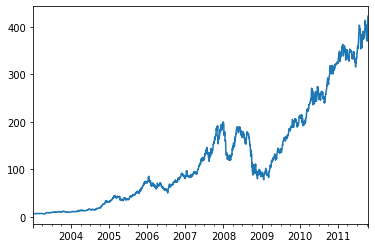

In [226]:
px.AAPL.plot()

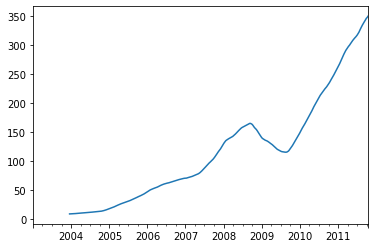

In [227]:
px.AAPL.rolling(250).mean().plot()

In [229]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()

In [231]:
appl_std250

2003-01-02          NaN
2003-01-03          NaN
2003-01-06          NaN
2003-01-07          NaN
2003-01-08          NaN
2003-01-09          NaN
2003-01-10          NaN
2003-01-13          NaN
2003-01-14          NaN
2003-01-15     0.077496
2003-01-16     0.074760
2003-01-17     0.112368
2003-01-21     0.138735
2003-01-22     0.164631
2003-01-23     0.165731
2003-01-24     0.184082
2003-01-27     0.182978
2003-01-28     0.178066
2003-01-29     0.181329
2003-01-30     0.177545
2003-01-31     0.173577
2003-02-03     0.170500
2003-02-04     0.167001
2003-02-05     0.163414
2003-02-06     0.160049
2003-02-07     0.160469
2003-02-10     0.157733
2003-02-11     0.155131
2003-02-12     0.152458
2003-02-13     0.149969
                ...    
2011-09-02    27.798846
2011-09-06    27.549694
2011-09-07    27.321671
2011-09-08    27.123342
2011-09-09    26.883253
2011-09-12    26.671274
2011-09-13    26.544030
2011-09-14    26.431642
2011-09-15    26.411736
2011-09-16    26.454187
2011-09-19    26

In [230]:
expanding_mean = appl_std250.expanding().mean()

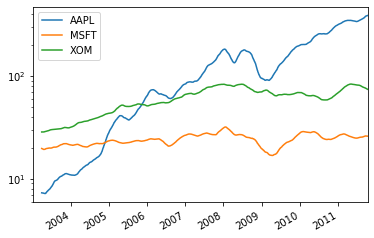

In [232]:
close_px.rolling(60).mean().plot(logy=True)

In [233]:
 close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
2003-01-09,7.391667,21.490000,29.273333
2003-01-10,7.387143,21.558571,29.238571
2003-01-13,7.378750,21.633750,29.197500
2003-01-14,7.370000,21.717778,29.194444
2003-01-15,7.355000,21.757000,29.152000


In [235]:
import matplotlib as plt

TypeError: 'module' object is not callable

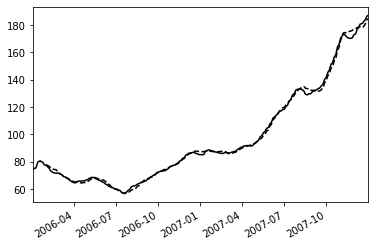

In [236]:
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()

### Exponentially Weighted Functions

### User-Defined Moving Window Functions

#### Might be useful for me in doing oos, check page 361